In [10]:
import xarray as xr
import os

# Define the directory where the files are located
directory = '/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/vwind/'

# Initialize an empty list to store datasets
datasets = []

# Loop through all files from vwind_ERA5_0.nc to vwind_ERA5_28.nc
for i in range(29):  # Assuming files go from 0 to 28
    file_name = f'vwind_ERA5_{i}.nc'
    file_path = os.path.join(directory, file_name)
    
    # Open the dataset
    ds = xr.open_dataset(file_path)
    
    # Extract the V10M variable (10 meter V wind component)
    v10_data = ds['V10M']
    
    # Append to the datasets list
    datasets.append(v10_data)

# Concatenate all datasets along the time dimension
combined_v10 = xr.concat(datasets, dim='time')

# Get the first and last time in the time series
first_time = combined_v10['time'].values[0]
last_time = combined_v10['time'].values[-1]

# Print the first and last time
print(f"First time in the series: {first_time}")
print(f"Last time in the series: {last_time}")

First time in the series: 1979-01-01T00:00:00.000000000
Last time in the series: 2018-09-12T00:00:00.000000000


In [9]:
# Save the combined dataset to a new NetCDF file
combined_v10.to_netcdf('v10_timeseries_1979_2018.nc')

In [12]:
# Define the directory where the files are located
directory = '/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/uwind/'

# Initialize an empty list to store datasets
datasets = []

# Loop through all files from vwind_ERA5_0.nc to vwind_ERA5_28.nc
for i in range(29):  # Assuming files go from 0 to 28
    file_name = f'uwind_ERA5_{i}.nc'
    file_path = os.path.join(directory, file_name)
    
    # Open the dataset
    ds = xr.open_dataset(file_path)
    
    # Extract the V10M variable (10 meter V wind component)
    u10_data = ds['U10M']
    
    # Append to the datasets list
    datasets.append(u10_data)

# Concatenate all datasets along the time dimension
combined_u10 = xr.concat(datasets, dim='time')

# Get the first and last time in the time series
first_time = combined_u10['time'].values[0]
last_time = combined_u10['time'].values[-1]

# Print the first and last time
print(f"First time in the series: {first_time}")
print(f"Last time in the series: {last_time}")

First time in the series: 1979-01-01T00:00:00.000000000
Last time in the series: 2018-09-12T00:00:00.000000000


In [13]:
# Save the combined dataset to a new NetCDF file
combined_u10.to_netcdf('u10_timeseries_1979_2018.nc')

In [14]:
#Compare 2018 data downloaded from the one Emelie send me

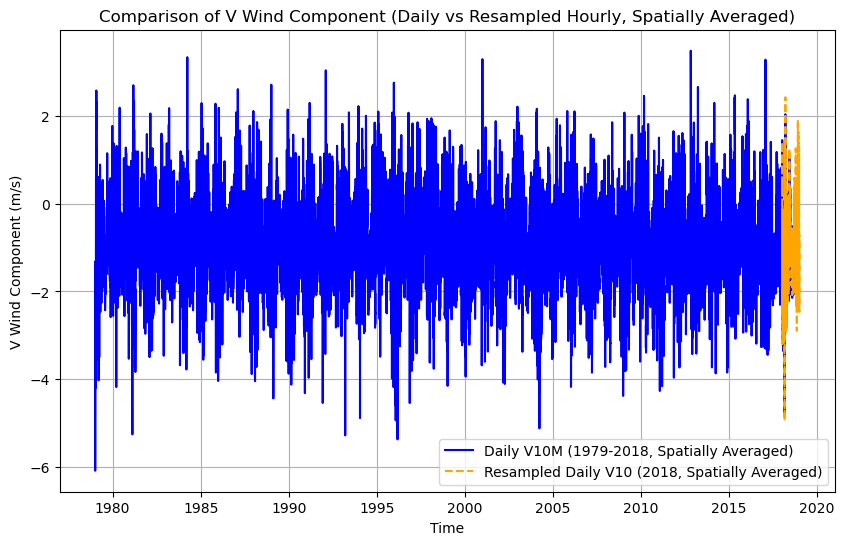

In [18]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the datasets
v10_daily = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/v10_timeseries_1979_2018.nc')
v10_data_1 = v10_daily['V10M']  # Daily wind component data

v10_hourly = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Python/Wind_data/v_component/v_wind_data_2018.nc')
v10_data_2 = v10_hourly['v10']  # Hourly wind component data

# Convert hourly data to daily by resampling
v10_data_2_daily = v10_data_2.resample(time='1D').mean()

# Apply spatial averaging for both datasets (taking the mean over spatial dimensions)
v10_data_1_avg = v10_data_1.mean(dim=['lat', 'lon'])  # Adjust 'lat' and 'lon' if necessary
v10_data_2_avg = v10_data_2_daily.mean(dim=['latitude', 'longitude'])  # Adjust 'latitude' and 'longitude' if necessary

# Plot the two time series
plt.figure(figsize=(10, 6))
plt.plot(v10_data_1_avg['time'], v10_data_1_avg, label='Daily V10M (1979-2018, Spatially Averaged)', color='blue')
plt.plot(v10_data_2_avg['time'], v10_data_2_avg, label='Resampled Daily V10 (2018, Spatially Averaged)', color='orange', linestyle='--')

# Add labels, legend, and title
plt.xlabel('Time')
plt.ylabel('V Wind Component (m/s)')
plt.title('Comparison of V Wind Component (Daily vs Resampled Hourly, Spatially Averaged)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


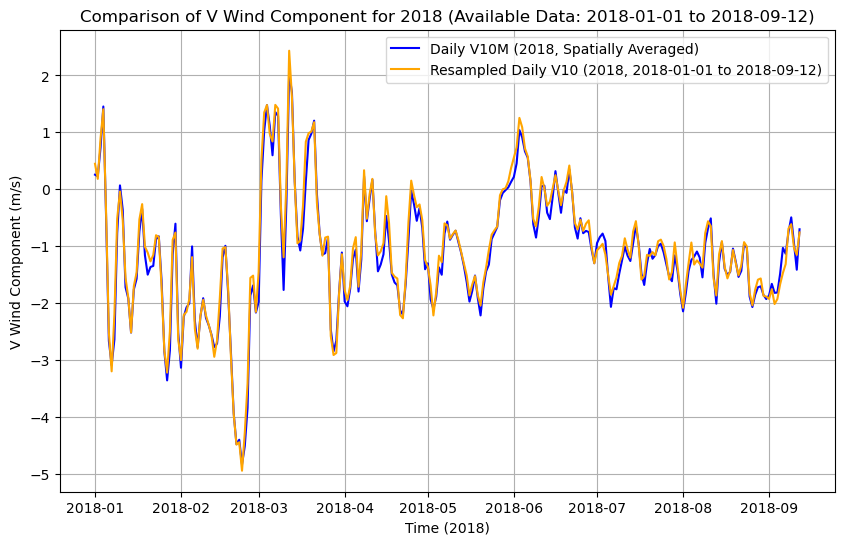

In [20]:
import xarray as xr
import matplotlib.pyplot as plt

# Load the datasets
v10_daily = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/v10_timeseries_1979_2018.nc')
v10_data_1 = v10_daily['V10M']  # Daily wind component data

v10_hourly = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Python/Wind_data/v_component/v_wind_data_2018.nc')
v10_data_2 = v10_hourly['v10']  # Hourly wind component data

# Convert hourly data to daily by resampling
v10_data_2_daily = v10_data_2.resample(time='1D').mean()

# Apply spatial averaging for both datasets
v10_data_1_avg = v10_data_1.mean(dim=['lat', 'lon'])  # Adjust 'lat' and 'lon' if necessary
v10_data_2_avg = v10_data_2_daily.mean(dim=['latitude', 'longitude'])  # Adjust 'latitude' and 'longitude' if necessary

# Filter data for the available part of 2018 in the first dataset
v10_data_1_2018 = v10_data_1_avg.sel(time=slice('2018-01-01', '2018-12-31'))

# Get the actual time range available in v10_data_1_2018
start_date = str(v10_data_1_2018['time'].min().values)[:10]  # Get the first available date in 2018
end_date = str(v10_data_1_2018['time'].max().values)[:10]  # Get the last available date in 2018

# Slice the second dataset (v10_data_2_avg) to match the time range of the first dataset
v10_data_2_2018 = v10_data_2_avg.sel(time=slice(start_date, end_date))

# Plot the two time series, focusing on the available data in 2018
plt.figure(figsize=(10, 6))
plt.plot(v10_data_1_2018['time'], v10_data_1_2018, label='Daily V10M (2018, Spatially Averaged)', color='blue')
plt.plot(v10_data_2_2018['time'], v10_data_2_2018, label=f'Resampled Daily V10 (2018, {start_date} to {end_date})', color='orange')

# Add labels, legend, and title
plt.xlabel('Time (2018)')
plt.ylabel('V Wind Component (m/s)')
plt.title(f'Comparison of V Wind Component for 2018 (Available Data: {start_date} to {end_date})')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [4]:
import xarray as xr
import os

# Step 1: Load the daily dataset from 1979 to 2018
v10_daily = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds/v10_timeseries_1979_2018.nc')
v10_data_1 = v10_daily['V10M']  # Daily wind component data

# Step 2: Remove the year 2018 from the first dataset
v10_data_1_up_to_2017 = v10_data_1.sel(time=slice(None, '2017-12-31'))


In [5]:
# Step 3: Initialize an empty list for hourly datasets (2018-2024)
hourly_datasets = []

# List of years for which you have hourly data (from 2018 to 2024)
years = range(2018, 2025)

# Loop through the years and load each dataset
for year in years:
    file_path = f'/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Python/Wind_data/v_component/v_wind_data_{year}.nc'
    v10_hourly = xr.open_dataset(file_path)
    v10_data_hourly = v10_hourly['v10']  # Extract hourly wind component data
    
    # Step 4: Resample hourly data to daily mean values
    v10_data_daily = v10_data_hourly.resample(time='1D').mean()
    
    # Append the resampled daily dataset to the list
    hourly_datasets.append(v10_data_daily)

In [6]:
# Step 5: Concatenate all hourly datasets along the time dimension
v10_data_2_daily = xr.concat(hourly_datasets, dim='time')

In [ ]:
# Step 6: Combine the two datasets (up to 2017 and from 2018 onward)
final_combined_v10 = xr.concat([v10_data_1_up_to_2017, v10_data_2_daily], dim='time')

# Get the first and last time in the final combined time series
first_time = final_combined_v10['time'].values[0]
last_time = final_combined_v10['time'].values[-1]

# Print the first and last time
print(f"First time in the series: {first_time}")
print(f"Last time in the series: {last_time}")

In [4]:
import xarray as xr
import dask  # For lazy loading with xarray

# Step 1: Load the daily dataset from 1979 to 2018 with lazy loading
v10_daily = xr.open_dataset('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Data/Winds//v10_timeseries_1979_2018.nc', chunks={'time': 1000})
v10_data_1 = v10_daily['V10M']

# Step 2: Remove the year 2018 from the first dataset
v10_data_1_up_to_2017 = v10_data_1.sel(time=slice(None, '2017-12-31'))

# Step 3: Initialize an empty list for hourly datasets (2018-2024)
hourly_datasets = []

# List of years for which you have hourly data (from 2018 to 2024)
years = range(2018, 2025)

# Loop through the years and load each dataset with lazy loading
for year in years:
    file_path = f'/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Python/Wind_data/v_component/v_wind_data_{year}.nc'
    v10_hourly = xr.open_dataset(file_path, chunks={'time': 1000})  # Lazy loading
    v10_data_hourly = v10_hourly['v10']  # Extract hourly wind component data
    
    # Step 4: Resample hourly data to daily mean values
    v10_data_daily = v10_data_hourly.resample(time='1D').mean()
    
    # Append the resampled daily dataset to the list
    hourly_datasets.append(v10_data_daily)

# Step 5: Concatenate all hourly datasets along the time dimension
v10_data_2_daily = xr.concat(hourly_datasets, dim='time')

# Step 6: Combine the two datasets (up to 2017 and from 2018 onward) using lazy loading
final_combined_v10 = xr.concat([v10_data_1_up_to_2017, v10_data_2_daily], dim='time')

# Save to a new file if needed (to avoid recomputation every time)
final_combined_v10.to_netcdf('/Users/cristinaarumiplanas/Documents/Papers_Cristina/University_Hamburg/Sverdrup/Python/final_combined_v10.nc')

# Get the first and last time in the final combined time series
first_time = final_combined_v10['time'].values[0]
last_time = final_combined_v10['time'].values[-1]

print(f"First time in the series: {first_time}")
print(f"Last time in the series: {last_time}")


HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 1:
  #000: H5Dio.c line 291 in H5Dwrite(): can't write data
    major: Dataset
    minor: Write failed
  #001: H5VLcallback.c line 2113 in H5VL_dataset_write(): dataset write failed
    major: Virtual Object Layer
    minor: Write failed
  #002: H5VLcallback.c line 2080 in H5VL__dataset_write(): dataset write failed
    major: Virtual Object Layer
    minor: Write failed
  #003: H5VLnative_dataset.c line 207 in H5VL__native_dataset_write(): can't write data
    major: Dataset
    minor: Write failed
  #004: H5Dio.c line 741 in H5D__write(): unable to initialize storage
    major: Dataset
    minor: Unable to initialize object
  #005: H5Dint.c line 2413 in H5D__alloc_storage(): unable to initialize dataset with fill value
    major: Dataset
    minor: Unable to initialize object
  #006: H5Dint.c line 2471 in H5D__init_storage(): unable to allocate all chunks of dataset
    major: Dataset
    minor: Unable to initialize object
  #007: H5D

RuntimeError: NetCDF: HDF error

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 3:
  #000: H5Dio.c line 291 in H5Dwrite(): can't write data
    major: Dataset
    minor: Write failed
  #001: H5VLcallback.c line 2113 in H5VL_dataset_write(): dataset write failed
    major: Virtual Object Layer
    minor: Write failed
  #002: H5VLcallback.c line 2080 in H5VL__dataset_write(): dataset write failed
    major: Virtual Object Layer
    minor: Write failed
  #003: H5VLnative_dataset.c line 207 in H5VL__native_dataset_write(): can't write data
    major: Dataset
    minor: Write failed
  #004: H5Dio.c line 762 in H5D__write(): can't write data
    major: Dataset
    minor: Write failed
  #005: H5Dcontig.c line 628 in H5D__contig_write(): contiguous write failed
    major: Dataset
    minor: Write failed
  #006: H5Dselect.c line 311 in H5D__select_write(): write error
    major: Dataspace
    minor: Write failed
  #007: H5Dselect.c line 224 in H5D__select_io(): write error
    major: Dataspace
    minor: Write failed
  #008

HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 7:
  #000: H5Dio.c line 291 in H5Dwrite(): can't write data
    major: Dataset
    minor: Write failed
  #001: H5VLcallback.c line 2113 in H5VL_dataset_write(): dataset write failed
    major: Virtual Object Layer
    minor: Write failed
  #002: H5VLcallback.c line 2080 in H5VL__dataset_write(): dataset write failed
    major: Virtual Object Layer
    minor: Write failed
  #003: H5VLnative_dataset.c line 207 in H5VL__native_dataset_write(): can't write data
    major: Dataset
    minor: Write failed
  #004: H5Dio.c line 762 in H5D__write(): can't write data
    major: Dataset
    minor: Write failed
  #005: H5Dcontig.c line 628 in H5D__contig_write(): contiguous write failed
    major: Dataset
    minor: Write failed
  #006: H5Dselect.c line 311 in H5D__select_write(): write error
    major: Dataspace
    minor: Write failed
  #007: H5Dselect.c line 224 in H5D__select_io(): write error
    major: Dataspace
    minor: Write failed
  #008